# Experiment 2

In [1]:
import pandas as pd
import numpy as np

import quantstats as qs
from tinycta.port import build_portfolio

In [2]:
# Load prices
prices = pd.read_csv("data/Prices_hashed.csv", index_col=0, parse_dates=True).ffill()

In [3]:
# take two moving averages and apply the sign-function, adjust by volatility
def f(price, fast=32, slow=96, volatility=32):
    s = price.ewm(com=slow, min_periods=300).mean()
    f = price.ewm(com=fast, min_periods=300).mean()
    std = price.pct_change().ewm(com=volatility, min_periods=300).std()
    return np.sign(f-s)/std

In [4]:
from ipywidgets import Label, HBox, VBox, IntSlider

fast = IntSlider(min=4, max=192, step=4, value=32)
slow = IntSlider(min=4, max=192, step=4, value=96)
vola = IntSlider(min=4, max=192, step=4, value=32)
left_box = VBox([Label("Fast Moving Average"), Label("Slow Moving Average"), Label("Volatility")])
right_box = VBox([fast, slow, vola])
HBox([left_box, right_box])

In [5]:
portfolio = build_portfolio(prices=prices, cashposition=1e6*
                            f(prices, fast=fast.value, slow=slow.value, volatility=vola.value))

* This is a **univariate** trading system, we map the (real) price of an asset to its (cash)position
* Only 3 **free parameters** used here.
* Only 4 lines of code
* Scaling the bet-size by volatility has improved the situation.

Results do not look terrible but...
* No concept of risk integrated 

Often hedge funds outsource the risk management to some board or committee
and develop machinery for more systematic **parameter-hacking**.

In [9]:
capital = 1e9
a = portfolio.nav(aum=capital)

                    Strategy
------------------  ----------
Start Period        1970-01-02
End Period          2023-04-26
Risk-Free Rate      0.0%
Time in Market      97.0%

Cumulative Return   849.42%
CAGR﹪              2.96%

Sharpe              1.11
Prob. Sharpe Ratio  100.0%
Sortino             1.63
Sortino/√2          1.16
Omega               1.21

Max Drawdown        -10.89%
Longest DD Days     1596

Gain/Pain Ratio     0.21
Gain/Pain (1M)      1.28

Payoff Ratio        1.04
Profit Factor       1.21
Common Sense Ratio  1.27
CPC Index           0.68
Tail Ratio          1.05
Outlier Win Ratio   3.76
Outlier Loss Ratio  3.6

MTD                 0.61%
3M                  0.98%
6M                  -0.25%
YTD                 0.74%
1Y                  1.75%
3Y (ann.)           1.63%
5Y (ann.)           0.43%
10Y (ann.)          1.0%
All-time (ann.)     2.96%

Avg. Drawdown       -0.74%
Avg. Drawdown Days  35
Recovery Factor     21.03
Ulcer Index         0.03
Serenity Index      4.5


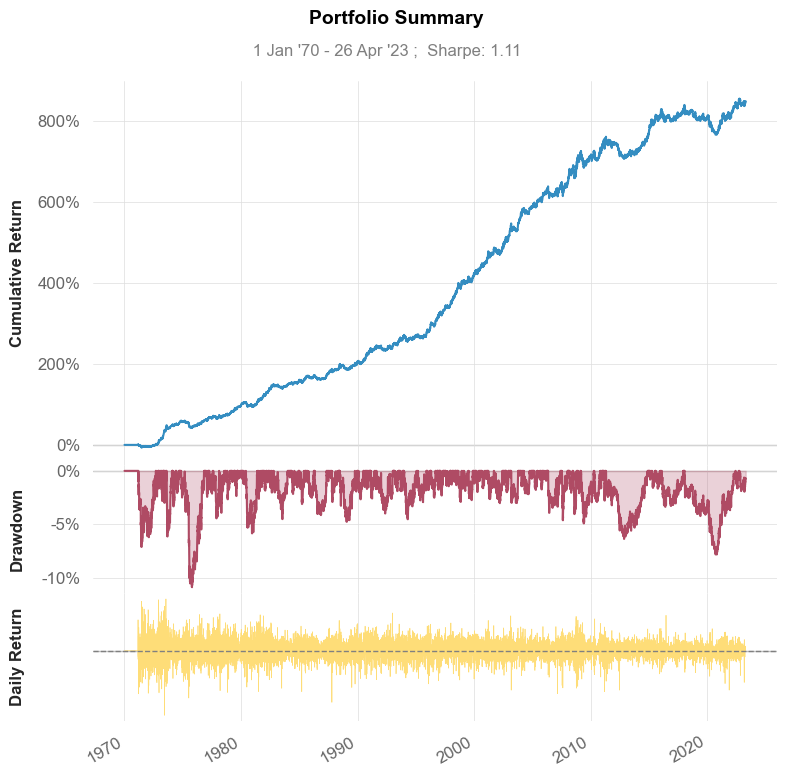

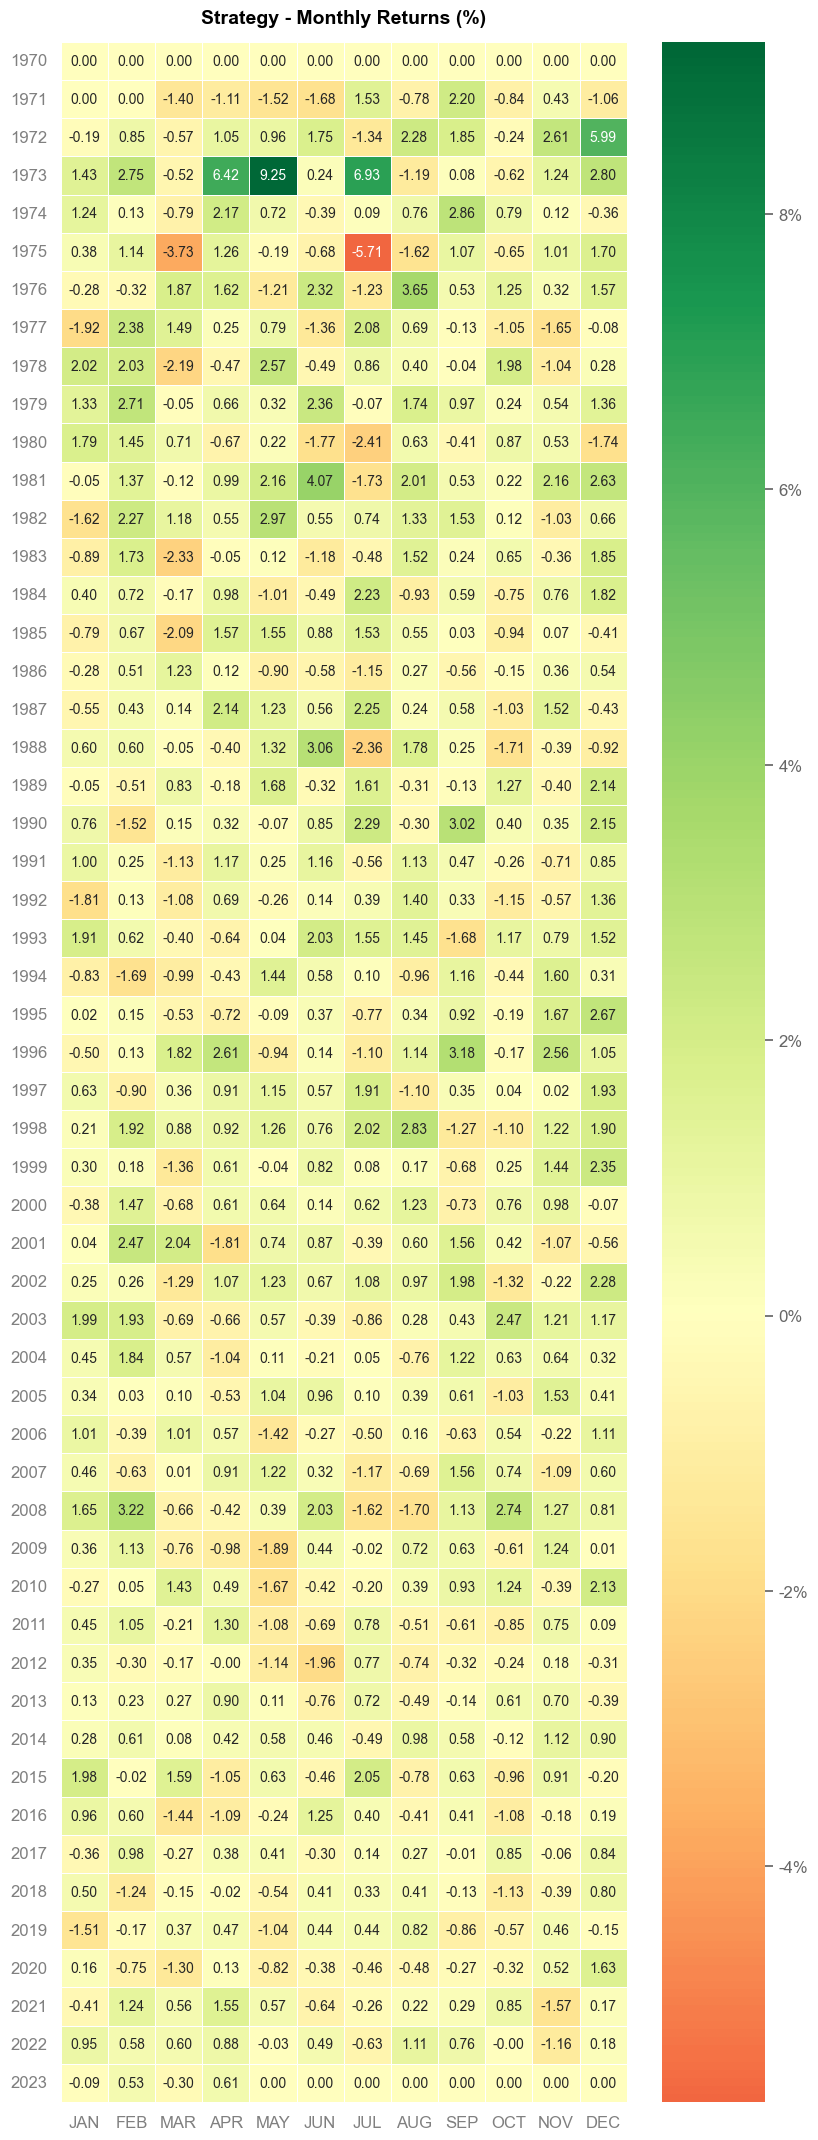

In [12]:
qs.reports.basic(a)